# MMSB: Simulations with new B

In [1]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

## Simulation 0: Toy graph

In [2]:
K = 2
V = 4
N = 100
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)
print pi
pd.DataFrame(utils.get_interactions(X, V))

[[  1.00000000e+00   1.18582519e-22]
 [  8.51475336e-19   1.00000000e+00]
 [  1.64102458e-10   1.00000000e+00]
 [  1.58237019e-11   1.00000000e+00]]


,0,1,2,3
0,0,13,13,17
1,1,0,8,6
2,1,5,0,13
3,4,7,12,0


0:00:00.341303


(-58.040103997199815, -58.040103997199836)

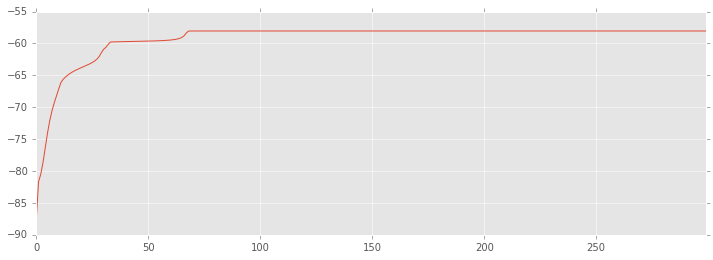

In [3]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Pi (prototype distributions)

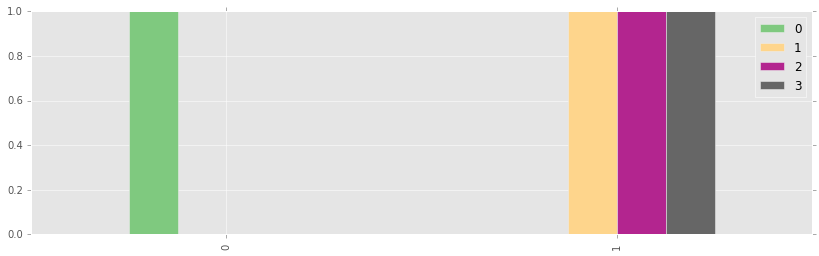

In [4]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

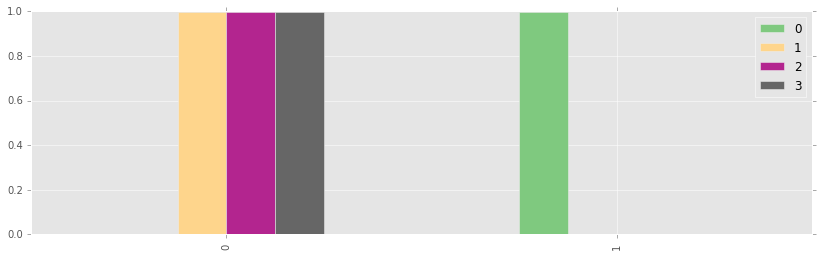

In [5]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [6]:
pd.DataFrame(B)

,0,1
0,0.500000,0.122449
1,0.877551,0.500000


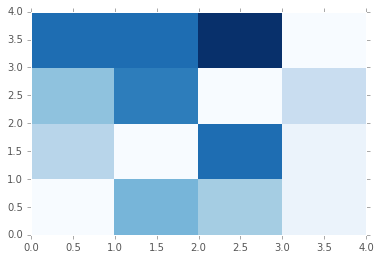

In [7]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation I: Small graph

In [8]:
K = 4
V = 10
N = 10000
B_ = utils.make_B(K, probs=[.2])
X, pi = utils.gen_data(B_, V, N, alpha=0.1)

In [9]:
print pi
pd.DataFrame(utils.get_interactions(X, V))

[[  1.72704301e-04   8.38174863e-01   1.61572106e-01   8.03264818e-05]
 [  1.99466672e-01   3.50012801e-12   5.09361669e-01   2.91171659e-01]
 [  3.59525785e-19   6.51297649e-01   4.27233062e-03   3.44430020e-01]
 [  2.10898385e-03   9.97804209e-01   8.68066567e-05   4.72206202e-11]
 [  1.09328836e-01   8.90670013e-01   1.10784354e-06   4.25133532e-08]
 [  7.46427412e-04   9.98688153e-01   1.40851929e-06   5.64011062e-04]
 [  2.15073490e-10   9.07847975e-01   9.21520246e-02   6.72163057e-12]
 [  5.88302321e-03   3.66775796e-03   3.40837131e-01   6.49612087e-01]
 [  8.38301442e-01   1.08700151e-01   5.29969761e-02   1.43094582e-06]
 [  2.80543719e-01   7.18973430e-01   4.82630648e-04   2.20207152e-07]]


,0,1,2,3,4,5,6,7,8,9
0,0,74,100,107,136,125,120,47,156,114
1,142,0,136,163,136,161,158,86,153,151
2,130,115,0,129,162,144,117,85,164,142
3,107,68,87,0,122,117,109,47,146,139
4,84,88,85,109,0,107,100,46,156,97
5,105,75,85,120,127,0,89,50,175,140
6,113,69,93,133,122,111,0,54,159,143
7,166,133,133,176,159,146,184,0,191,177
8,55,60,57,61,58,65,62,60,0,70
9,106,57,63,97,81,84,87,41,141,0


0:00:17.038858


(-6461.5778732463641, -6461.5778732463641)

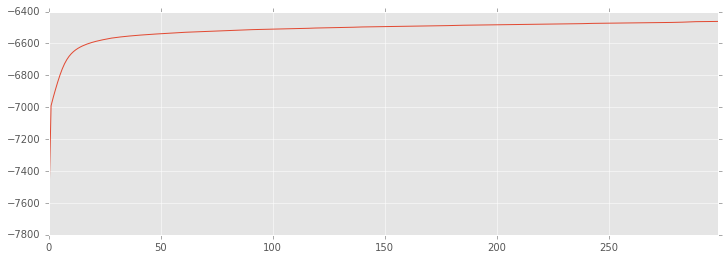

In [10]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

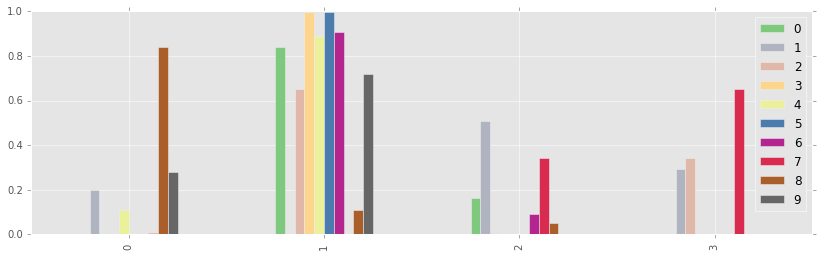

In [11]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

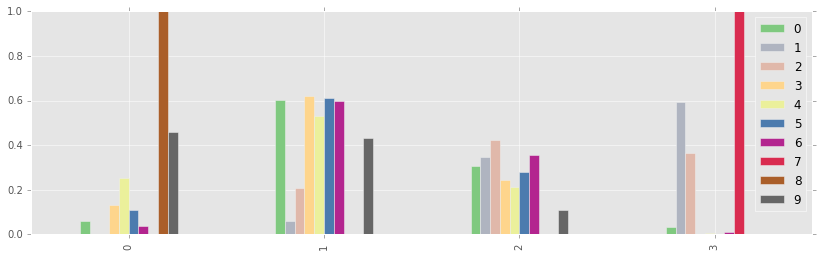

In [12]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [13]:
pd.DataFrame(B).round(6)

,0,1,2,3
0,0.500000,0.258391,0.282918,0.202529
1,0.741609,0.500000,0.480866,0.234191
2,0.717082,0.519134,0.500000,0.261119
3,0.797471,0.765809,0.738881,0.500000


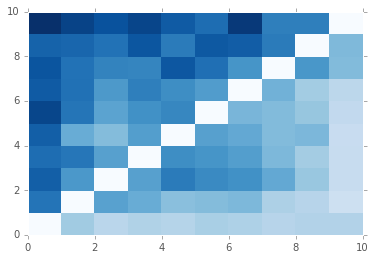

In [14]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation II: Medium graph

In [15]:
K = 4
V = 100
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

0:00:30.638632


(-4965.8515289612715, -4965.8515289612715)

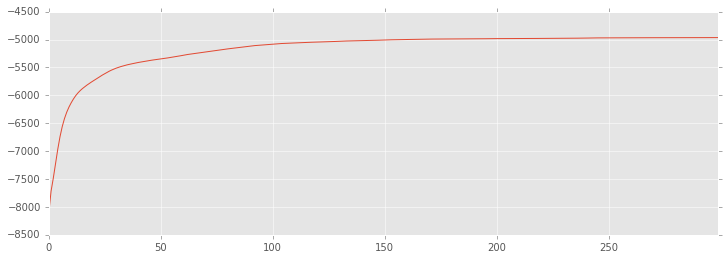

In [16]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

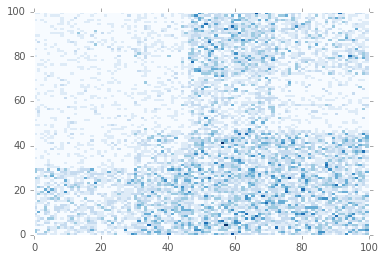

In [17]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

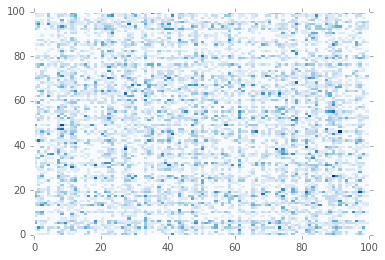

In [18]:
plt.pcolor(I, cmap='Blues')

## Simulation III: Large graph

In [19]:
K = 10
V = 300
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

0:02:48.999943


(-7046.0365402149973, -7046.0365402149973)

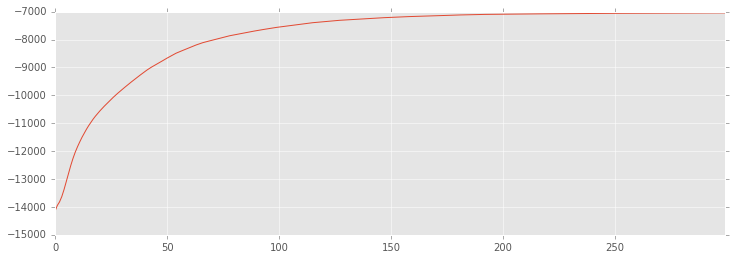

In [20]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

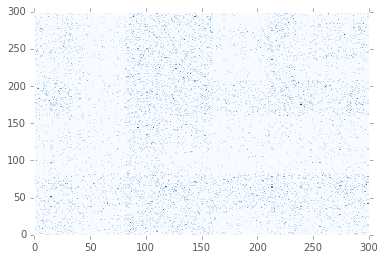

In [21]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')